# Principal Component Analysis (PCA)

Use any data set having continuous variables

* Can be one that we have already used
* More variables, the better
* Perform  PCA or Factor Analysis on SAS
* Interpret the results using the methods described in these slides for Week 4, Lecture 1

Question: is the data be more efficiently expressed using PCA? – How big are the 1 st, 2 nd and 3 rd components? 
Consideration is made for using interesting data and insights. Use literature and SAS for pointer on interpretation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

df = pd.read_csv("/Users/RyanPaw/ANA620/diamonds.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
df.shape

(53940, 11)

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
#Correlation matrix
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Text(0.5, 1.0, 'Correlation between different features')

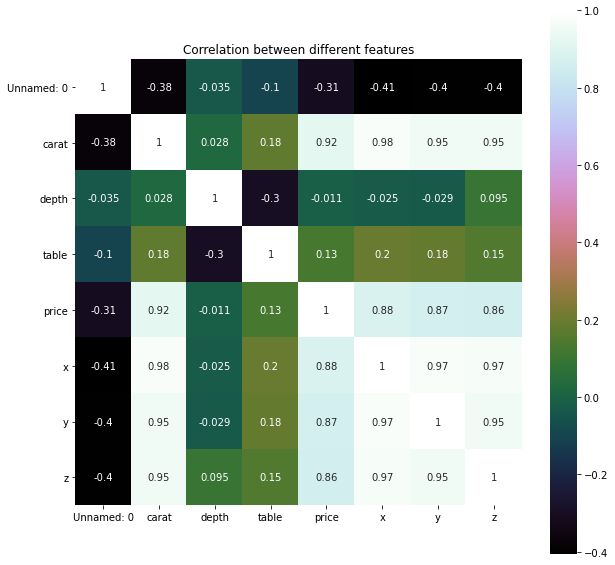

In [6]:
#Heatmap visualization of correlation matrix
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [7]:
#Drop all non-numerical variables for PCA. 'Unnamed: 0' dropped since it's just an index
df_drop = df.drop(labels=['Unnamed: 0','cut','color','clarity','depth'],axis=1)

In [8]:
df_drop.head()

,carat,table,price,x,y,z
0,0.23,55.0,326,3.95,3.98,2.43
1,0.21,61.0,326,3.89,3.84,2.31
2,0.23,65.0,327,4.05,4.07,2.31
3,0.29,58.0,334,4.20,4.23,2.63
4,0.31,58.0,335,4.34,4.35,2.75


In [9]:
X = df_drop.iloc[:,0:6].values 
y = df_drop.iloc[:,0].values

In [10]:
#Standardize the range of continuous initial variables so that each one of them contributes equally to the analysis
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [11]:
X_std

array([[-1.19816781, -1.09967199, -0.90409516, -1.58783745, -1.53619556,
        -1.57112919],
       [-1.24036129,  1.58552871, -0.90409516, -1.64132529, -1.65877419,
        -1.74117497],
       [-1.19816781,  3.37566251, -0.9038445 , -1.49869105, -1.45739502,
        -1.74117497],
       ...,
       [-0.20662095,  1.13799526, -0.29473076, -0.06343409, -0.04774083,
         0.03013526],
       [ 0.13092691,  0.24292836, -0.29473076,  0.37338325,  0.33750627,
         0.28520393],
       [-0.10113725, -1.09967199, -0.29473076,  0.08811478,  0.11861587,
         0.14349912]])

In [12]:
#Covariance matrix - the variance relationship between the variables
pca = PCA().fit(X_std)
cov_mat = pca.get_covariance()
cov_mat

array([[1.00001854, 0.18162091, 0.92160839, 0.9751123 , 0.95173984,
        0.95340506],
       [0.18162091, 1.00001854, 0.12713626, 0.1953479 , 0.18376355,
        0.15093149],
       [0.92160839, 0.12713626, 1.00001854, 0.88445156, 0.86543694,
        0.86126541],
       [0.9751123 , 0.1953479 , 0.88445156, 1.00001854, 0.97471955,
        0.9707898 ],
       [0.95173984, 0.18376355, 0.86543694, 0.97471955, 1.00001854,
        0.95202337],
       [0.95340506, 0.15093149, 0.86126541, 0.9707898 , 0.95202337,
        1.00001854]])

Text(0.5, 1.0, 'Correlation between different features')

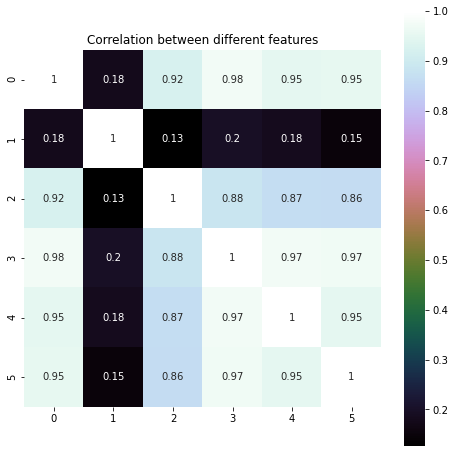

In [13]:
#Heatmap visualization of covariance matrix
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [14]:
#Compute eigenvalues + eigenvector
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.45245191 -0.03407302  0.06194299 -0.4282574   0.76835687  0.12850166]
 [ 0.09944482  0.99343242  0.04096621 -0.01229823 -0.02860246  0.02356201]
 [ 0.42551867 -0.08428396  0.85376195  0.0766033  -0.27666429 -0.02256998]
 [ 0.45320843 -0.01802671 -0.23156937  0.83019938  0.22169469 -0.04767842]
 [ 0.44726011 -0.02648759 -0.30991311 -0.29755798 -0.28314142 -0.73109565]
 [ 0.44597351 -0.06164988 -0.34044802 -0.18112018 -0.45049849  0.66756922]]

Eigenvalues 
[4.76399999 0.96519205 0.17549975 0.01457479 0.03304831 0.04779635]


In [15]:
#Sort eigenvalues (Descending)
sorted(eig_vals, reverse=True)

[4.76399998760111,
 0.9651920544790927,
 0.17549974666801565,
 0.04779634750196302,
 0.03304830936580837,
 0.014574791151457812]

In [16]:
#Compute variance for each of the 6 components
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.79398528, 0.16086236, 0.02924942, 0.00796591, 0.00550795,
       0.00242909])

Text(0, 0.5, 'Cumulative explained variance')

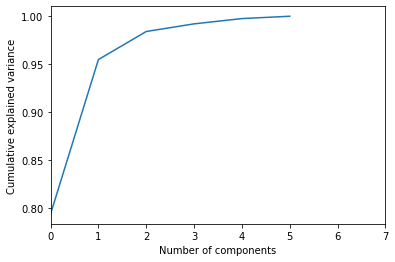

In [17]:
#Line graph of the explained variance for each component. '0' is the first component (0.80)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

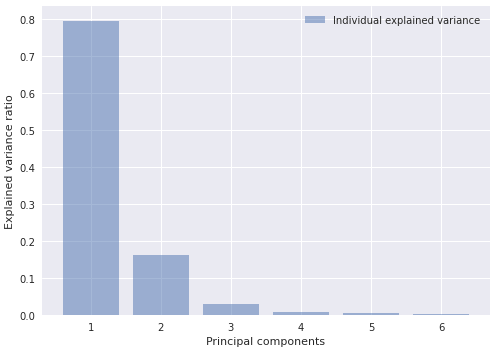

In [18]:
#Bar chart of the explained variance for each component
with plt.style.context('seaborn'):
    plt.figure(figsize=(7, 5))

    plt.bar(range(1,7), explained_variance, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [19]:
#Component 1,2,3 explains 98% of the total variance. Therefore, I kept Components 1-3. 
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [20]:
print(Y_sklearn)

[[-3.14356167 -0.80925039 -0.48751994]
 [-3.05052448  1.87444703 -0.70317546]
 [-2.69859586  3.64345993 -0.68389828]
 ...
 [-0.14239366  1.16295287  0.19858387]
 [ 0.40534958  0.22845952  0.52172691]
 [-0.12354655 -1.07773966  0.40896334]]


In [21]:
Y_sklearn.shape

(53940, 3)

I used the Diamond dataset that contains attributes of 53,940 diamonds. PCA is a technique for feature extraction and it combines our input variables, so we can drop our "least important" variables, while still retaining the most valuable parts of all the variables. Each "new" variable after PCA are all independent of one another. I conducted my Principal Component Analysis (PCA) with the following steps:

1. Standardization
 * Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. This can be thought of as subtracting the mean value or centering the data. This helps scale our data. y = (x - mean) / standard_deviation
2. Covariance Matrix Computation
    *  This helps us how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them
3. Compute Eigenvectors and Eigenvalues of the covariance matrix to identify the principal components
    * The principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. PCA will put the maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in my line graph or bar chart above. The eigenvectors of the covariance matrix are the directions of the axes where there is the most variance (most information), which are the Principal Components. Eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component. By ranking the eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.
4. Determine how many components to drop
    * Component 1,2,3 explains 98% of the total variance. Therefore, I kept Components 1-3.  
5. Result: New dimensions of our dataset
    * (53940, 3) 

1st component:
* Explained variance: **0.79 (79%)**

2nd component:
* Explained variance: **0.16 (16%)**

3rd component:
* Explained variance: **0.03 (3%)**


**My initial dimension of the data was (53940, 11). My new dimension of the data is: (53940, 3) which has a total of 98% explained variance. Therefore, the data is more efficiently expressed using PCA because I was able to reduce the dimensionality of the dataset, while keeping a high percentage of the explained variance.**